In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('data/poultry_weight_15_08_2023.csv')
df_lot_info = pd.read_csv('data/lot_info_15_ago_2023.csv')

In [149]:
df_novo = df.merge(df_lot_info[['input_total','uuid',  'deaths', 'mortality', 'output_total' ]], 
                            left_on='animal_group_uuid', 
                            right_on='uuid', 
                            how='left')

df_novo = df_novo.drop(columns=['uuid'])
df_novo

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,input_total,deaths,mortality,output_total
0,2021-02-10,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,3,0.101,1,19600,19600.0,513.0,2.617347,18992.0
1,2021-02-13,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,6,0.176,1,19600,19600.0,513.0,2.617347,18992.0
2,2021-02-20,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,13,0.454,1,19600,19600.0,513.0,2.617347,18992.0
3,2021-02-27,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,20,0.879,1,19600,19600.0,513.0,2.617347,18992.0
4,2021-03-06,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,27,1.451,1,19600,19600.0,513.0,2.617347,18992.0
...,...,...,...,...,...,...,...,...,...,...,...,...
131650,2022-05-13,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,14,0.330,1,30400,NaN,NaN,NaN,NaN
131651,2022-05-27,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,28,1.300,1,30400,NaN,NaN,NaN,NaN
131652,2022-05-30,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,31,1.550,1,30400,NaN,NaN,NaN,NaN
131653,2022-06-02,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,34,1.840,1,30400,NaN,NaN,NaN,NaN


In [34]:
#contar quatnidade de nan
df_novo.isna().sum()


reference_date                          0
holding_uuid                            0
farm_uuid                               0
animal_group_uuid                       0
animal_group_age                        0
total_measurement_weight                0
total_animal_measurement                0
balance_animals_stock_accumulated       0
input_total                             0
deaths                                  0
mortality                               0
output_total                         6092
dtype: int64

In [150]:
#mediana de mortality
mediana_mortalidade = df_novo['mortality'].median()
#preencher mortality nan com mediana
df_novo['mortality'] = df_novo['mortality'].fillna(mediana_mortalidade)

#mediana de deaths
mediana_deaths = df_novo['deaths'].median()
#preencher deaths nan com mediana
df_novo['deaths'] = df_novo['deaths'].fillna(mediana_deaths)

#mediana de input_total
mediana_input_total = df_novo['input_total'].median()
#preencher input_total nan com mediana
df_novo['input_total'] = df_novo['input_total'].fillna(mediana_input_total) 
df_novo

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,input_total,deaths,mortality,output_total
0,2021-02-10,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,3,0.101,1,19600,19600.0,513.0,2.617347,18992.0
1,2021-02-13,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,6,0.176,1,19600,19600.0,513.0,2.617347,18992.0
2,2021-02-20,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,13,0.454,1,19600,19600.0,513.0,2.617347,18992.0
3,2021-02-27,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,20,0.879,1,19600,19600.0,513.0,2.617347,18992.0
4,2021-03-06,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,27,1.451,1,19600,19600.0,513.0,2.617347,18992.0
...,...,...,...,...,...,...,...,...,...,...,...,...
131650,2022-05-13,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,14,0.330,1,30400,28000.0,1114.0,4.316770,NaN
131651,2022-05-27,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,28,1.300,1,30400,28000.0,1114.0,4.316770,NaN
131652,2022-05-30,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,31,1.550,1,30400,28000.0,1114.0,4.316770,NaN
131653,2022-06-02,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,34,1.840,1,30400,28000.0,1114.0,4.316770,NaN


In [151]:
#calcular a porcentagem de animais utilizados em cada pesagem com relação ao input_total ou balance_animal_stock_accumulated
df_novo['percent_usable'] = ( df_novo['total_animal_measurement']/df_novo[['input_total', 'balance_animals_stock_accumulated']].max(axis=1)) * 100
#df_novo['percent_usable'] = (df_novo['total_animal_measurement']/df_novo['input_total'] * 100) 
df_novo

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,input_total,deaths,mortality,output_total,percent_usable
0,2021-02-10,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,3,0.101,1,19600,19600.0,513.0,2.617347,18992.0,0.005102
1,2021-02-13,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,6,0.176,1,19600,19600.0,513.0,2.617347,18992.0,0.005102
2,2021-02-20,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,13,0.454,1,19600,19600.0,513.0,2.617347,18992.0,0.005102
3,2021-02-27,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,20,0.879,1,19600,19600.0,513.0,2.617347,18992.0,0.005102
4,2021-03-06,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,27,1.451,1,19600,19600.0,513.0,2.617347,18992.0,0.005102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131650,2022-05-13,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,14,0.330,1,30400,28000.0,1114.0,4.316770,NaN,0.003289
131651,2022-05-27,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,28,1.300,1,30400,28000.0,1114.0,4.316770,NaN,0.003289
131652,2022-05-30,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,31,1.550,1,30400,28000.0,1114.0,4.316770,NaN,0.003289
131653,2022-06-02,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,34,1.840,1,30400,28000.0,1114.0,4.316770,NaN,0.003289


In [152]:
df_filtrado = df_novo[(df_novo['total_measurement_weight'] > 4000) & (df_novo['total_measurement_weight'] < 10000)]
df_filtrado


,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,input_total,deaths,mortality,output_total,percent_usable
74366,2022-05-18,071c638d-bb9b-4e68-a5d1-416da57d887f,db6d2d90-7815-4da4-b49f-bb8b53ebf332,43a6a226-bd0a-4433-aa8b-e6318c347611,35,6260.88,2400,32000,32000.0,960.0,3.000000,30815.0,7.500000
74889,2022-05-18,071c638d-bb9b-4e68-a5d1-416da57d887f,db6d2d90-7815-4da4-b49f-bb8b53ebf332,b28b754f-b5d8-43c7-8e31-e8719edbb4c8,35,6273.12,2400,32000,32000.0,853.0,2.665625,30227.0,7.500000
75108,2022-05-18,071c638d-bb9b-4e68-a5d1-416da57d887f,db6d2d90-7815-4da4-b49f-bb8b53ebf332,d88ba809-06f3-4146-b318-1a6296206255,35,6812.10,3000,33000,28000.0,1114.0,4.316770,NaN,9.090909
90717,2019-01-27,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,7,5377.00,28300,27913,28300.0,1584.0,5.597173,26688.0,100.000000
90725,2020-10-14,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,1cf8462c-683a-4639-8782-4e6a97aa5ae4,14,9486.68,27951,27900,27901.0,1114.0,4.316770,24141.0,100.179205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127563,2019-08-09,b34b351a-b658-495d-9139-b9edd6c3f6dc,ffd9957f-e9a0-4a9d-b8cf-244c78d08743,c4086fe2-646c-4ecc-9890-8cd1c25a97b9,7,4800.00,30000,29545,30000.0,1127.0,3.756667,28932.0,100.000000
127570,2020-08-01,b34b351a-b658-495d-9139-b9edd6c3f6dc,ffd9957f-e9a0-4a9d-b8cf-244c78d08743,cfa9cd1b-55de-41b0-9d83-b6ff9cc7c46a,6,5400.00,30000,29692,30000.0,1580.0,5.266667,28032.0,100.000000
127576,2019-02-08,b34b351a-b658-495d-9139-b9edd6c3f6dc,ffd9957f-e9a0-4a9d-b8cf-244c78d08743,e1d1b2b0-5ff3-43ba-b347-6affda3e4f9a,6,5424.50,28550,28117,28550.0,1127.0,3.947461,27304.0,100.000000
127583,2018-09-07,b34b351a-b658-495d-9139-b9edd6c3f6dc,ffd9957f-e9a0-4a9d-b8cf-244c78d08743,f50d57ca-fd3e-4a73-866b-88cd8f1da6dc,7,5453.00,28700,28027,28700.0,2006.0,6.989547,26694.0,100.000000


In [153]:
#df_novo['input_weight_media'] = df_novo['total_measurement_weight']/df_novo['total_animal_measurement']
condicao = df_novo['total_measurement_weight'] > 10
# Atribua os valores com base na condição
df_novo['input_weight_media'] = np.where(condicao, df_novo['total_measurement_weight'] / df_novo['total_animal_measurement'], df_novo['total_measurement_weight'])
df_novo

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,input_total,deaths,mortality,output_total,percent_usable,input_weight_media
0,2021-02-10,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,3,0.101,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.101
1,2021-02-13,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,6,0.176,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.176
2,2021-02-20,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,13,0.454,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.454
3,2021-02-27,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,20,0.879,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.879
4,2021-03-06,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,27,1.451,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,1.451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131650,2022-05-13,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,14,0.330,1,30400,28000.0,1114.0,4.316770,NaN,0.003289,0.330
131651,2022-05-27,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,28,1.300,1,30400,28000.0,1114.0,4.316770,NaN,0.003289,1.300
131652,2022-05-30,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,31,1.550,1,30400,28000.0,1114.0,4.316770,NaN,0.003289,1.550
131653,2022-06-02,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,34,1.840,1,30400,28000.0,1114.0,4.316770,NaN,0.003289,1.840


In [154]:
#criar coluna output_weight_media
df_novo['output_weight_media'] = df_novo.groupby('animal_group_uuid')['input_weight_media'].transform('max')
df_novo

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,input_total,deaths,mortality,output_total,percent_usable,input_weight_media,output_weight_media
0,2021-02-10,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,3,0.101,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.101,2.666
1,2021-02-13,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,6,0.176,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.176,2.666
2,2021-02-20,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,13,0.454,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.454,2.666
3,2021-02-27,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,20,0.879,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.879,2.666
4,2021-03-06,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,27,1.451,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,1.451,2.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131650,2022-05-13,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,14,0.330,1,30400,28000.0,1114.0,4.316770,NaN,0.003289,0.330,2.060
131651,2022-05-27,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,28,1.300,1,30400,28000.0,1114.0,4.316770,NaN,0.003289,1.300,2.060
131652,2022-05-30,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,31,1.550,1,30400,28000.0,1114.0,4.316770,NaN,0.003289,1.550,2.060
131653,2022-06-02,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,34,1.840,1,30400,28000.0,1114.0,4.316770,NaN,0.003289,1.840,2.060


(array([1.25547e+05, 3.00000e+00, 8.00000e+00, 1.00000e+00, 4.00000e+00]),
 array([3.0000000e-03, 7.0400240e+02, 1.4080018e+03, 2.1120012e+03,
        2.8160006e+03, 3.5200000e+03]),
 <BarContainer object of 5 artists>)

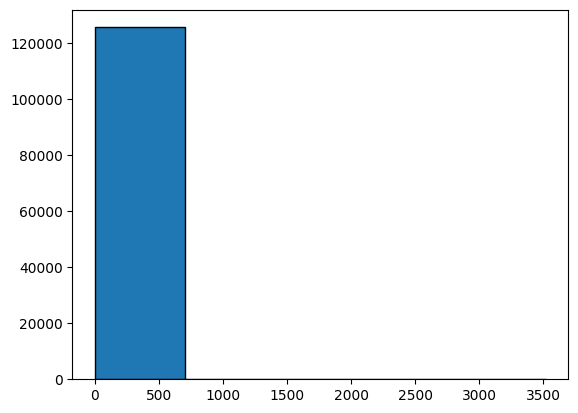

In [90]:
plt.hist(df_novo['input_weight_media'], bins=5, edgecolor='black')


Text(0, 0.5, 'Peso Total de Medição em Kg')

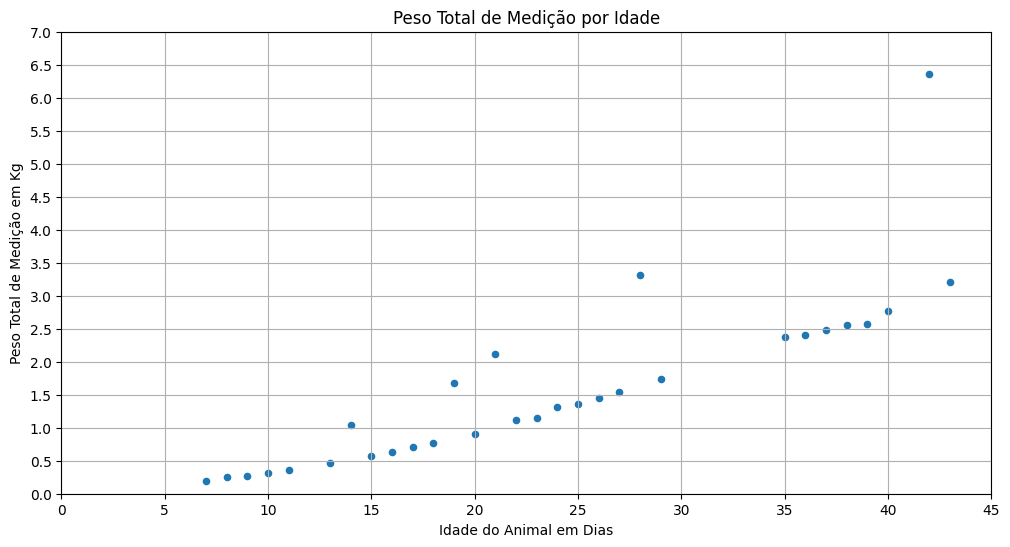

In [155]:
df_id = df_novo[df_novo['animal_group_uuid'] == '8cfb1806-2f97-42ed-950a-ddcf025725b1']
df_id.plot.scatter(x='animal_group_age', y='total_measurement_weight', figsize=(12, 6))
#definirlimite de x ate 45
plt.xlim(0, 45)
#definir limite de y ate 7
plt.ylim(0, 7)
# variar y de 0.5 em  0.5
plt.yticks(np.arange(0, 7.5, 0.5))
# colocar grid no grafico
plt.grid(True)
#definir titulo do grafico
plt.title('Peso Total de Medição por Idade')
#definir nome dos eixos
plt.xlabel('Idade do Animal em Dias')
plt.ylabel('Peso Total de Medição em Kg')

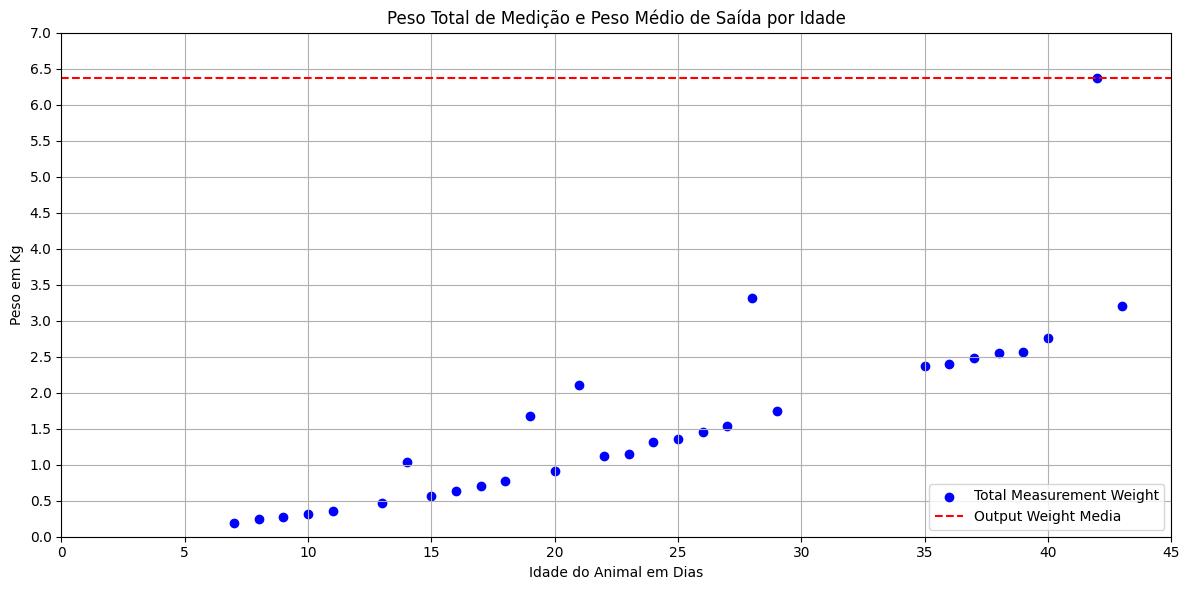

In [156]:
# Cria o gráfico de dispersão original
plt.figure(figsize=(12, 6))
plt.scatter(df_id['animal_group_age'], df_id['total_measurement_weight'], label='Total Measurement Weight', color='blue')

# Adiciona uma linha horizontal para output_weight_media
plt.axhline(y=df_id['output_weight_media'].iloc[0], color='red', linestyle='--', label='Output Weight Media')

# Definir limites de x e y
plt.xlim(0, 45)
plt.ylim(0, 7)

# Define intervalos do eixo y
plt.yticks(np.arange(0, 7.5, 0.5))

# Adiciona uma legenda
plt.legend()

# Adiciona um título e rótulos dos eixos
plt.title('Peso Total de Medição e Peso Médio de Saída por Idade')
plt.xlabel('Idade do Animal em Dias')
plt.ylabel('Peso em Kg')

# Adiciona um grid
plt.grid(True)

# Exibe o gráfico
plt.tight_layout()
plt.show()


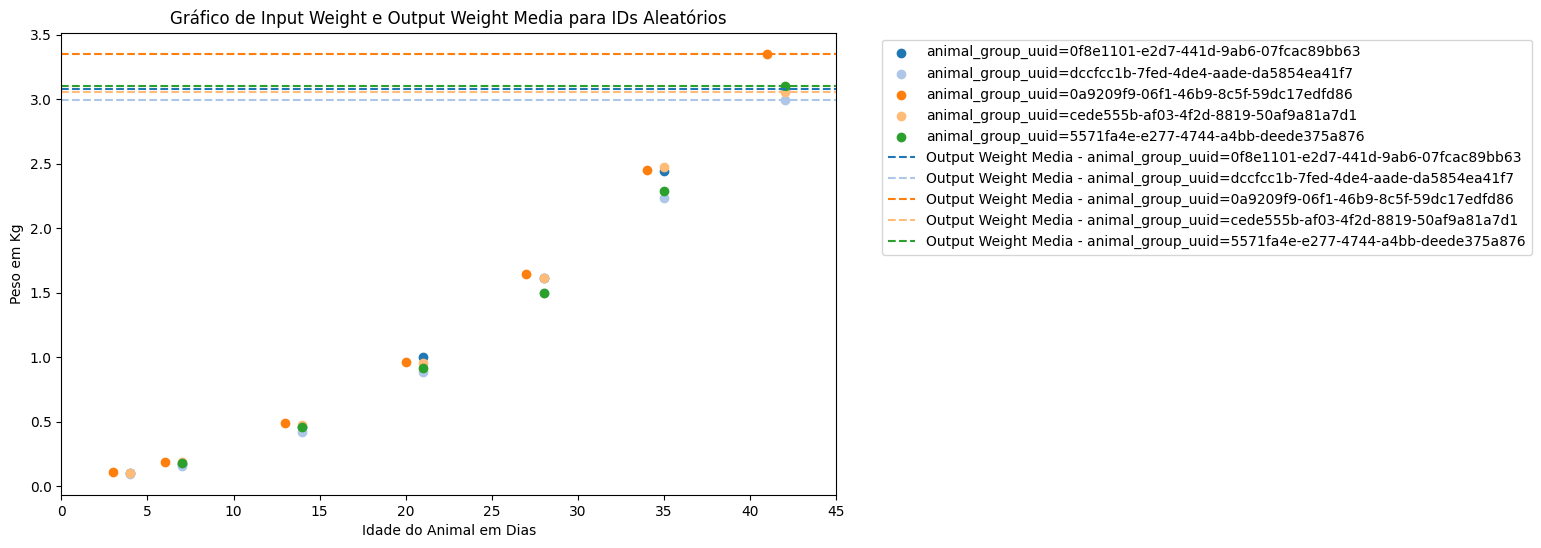

In [157]:
import random
import matplotlib.pyplot as plt

num_ids = 5

# Seleciona IDs aleatórios do DataFrame
ids_aleatorios = random.sample(df_novo['animal_group_uuid'].unique().tolist(), num_ids)

# Associa cores diferentes a cada lote usando a paleta "tab20"
paleta_cores = plt.get_cmap("tab20")
cores_lotes = [paleta_cores(i) for i in range(len(ids_aleatorios))]

# Filtra o DataFrame para conter apenas as linhas com IDs aleatórios
amostra = df_novo[df_novo['animal_group_uuid'].isin(ids_aleatorios)]

# Cria o gráfico de dispersão
plt.figure(figsize=(10, 6))
for idx, id in enumerate(amostra['animal_group_uuid'].unique()):
    subset = amostra[amostra['animal_group_uuid'] == id]
    plt.scatter(subset['animal_group_age'], subset['input_weight_media'], label=f'animal_group_uuid={id}', c=[cores_lotes[idx]])

# Plota uma linha representando o output_weight_media de cada lote
for idx, id in enumerate(amostra['animal_group_uuid'].unique()):
    output_weight_media = amostra[amostra['animal_group_uuid'] == id]['output_weight_media'].values[0]
    plt.axhline(y=output_weight_media, color=cores_lotes[idx], linestyle='--', label=f'Output Weight Media - animal_group_uuid={id}')

# Define os intervalos desejados no eixo x
intervalo_x = range(0, int(amostra['animal_group_age'].max()) + 5, 5)

# Configura os rótulos do eixo x para exibir os intervalos desejados
plt.xticks(intervalo_x)

plt.xlabel('Idade do Animal em Dias')
plt.ylabel('Peso em Kg')
plt.title(f'Gráfico de Input Weight e Output Weight Media para IDs Aleatórios')

# Mova a legenda para fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [95]:
print(df_novo.describe())

       animal_group_age  total_measurement_weight  total_animal_measurement   
count      125563.00000              1.255630e+05             125563.000000  \
mean           22.70250              1.987355e+04               7638.158279   
std            13.77959              7.172540e+05              12937.322575   
min             1.00000              3.000000e-03                  1.000000   
25%            13.00000              4.620000e-01                  1.000000   
50%            21.00000              1.678000e+00                  1.000000   
75%            34.00000              5.339000e+03              17600.000000   
max           919.00000              1.115840e+08             124000.000000   

       balance_animals_stock_accumulated    input_total         deaths   
count                       125563.00000  125563.000000  125563.000000  \
mean                         26761.70246   26918.093411    1420.955210   
std                           6733.50134    6784.569685    2092.37

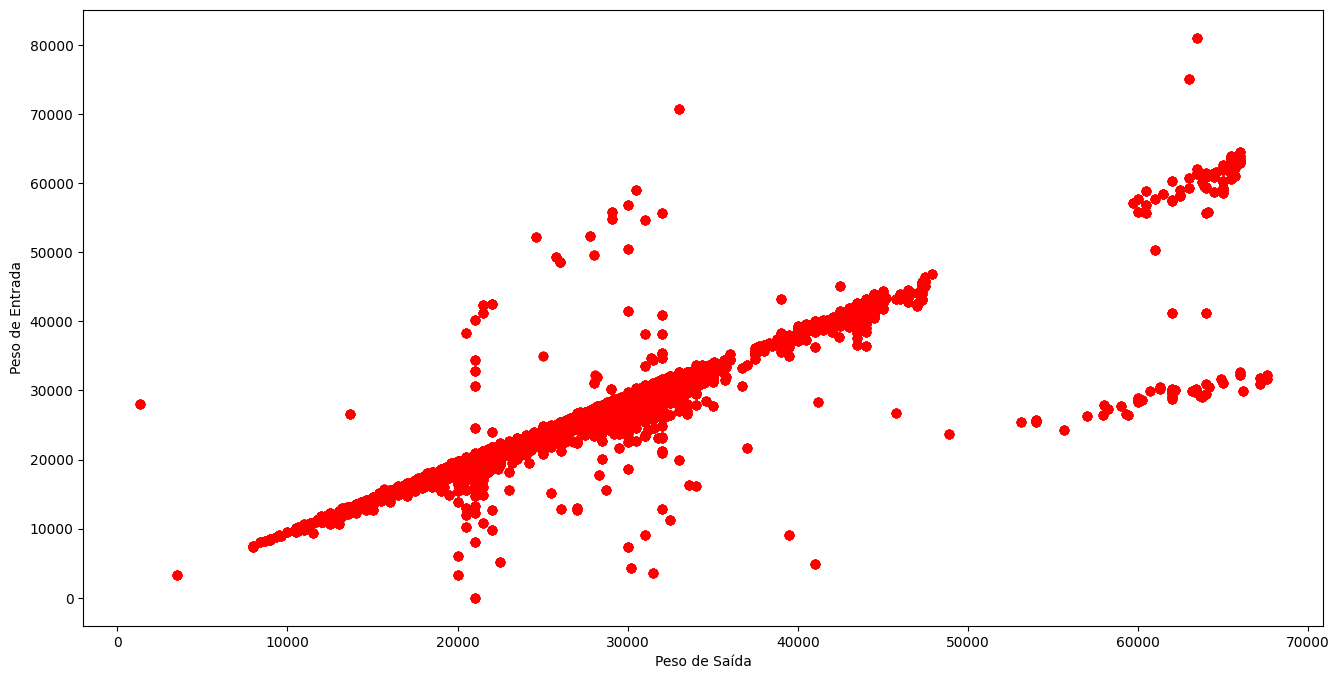

In [158]:
plt.figure(figsize = (16,8))
plt.scatter(
    df_novo['input_total'], 
    df_novo['output_total'], 
    c='red')
plt.xlabel("Peso de Saída")
plt.ylabel("Peso de Entrada")
plt.show()

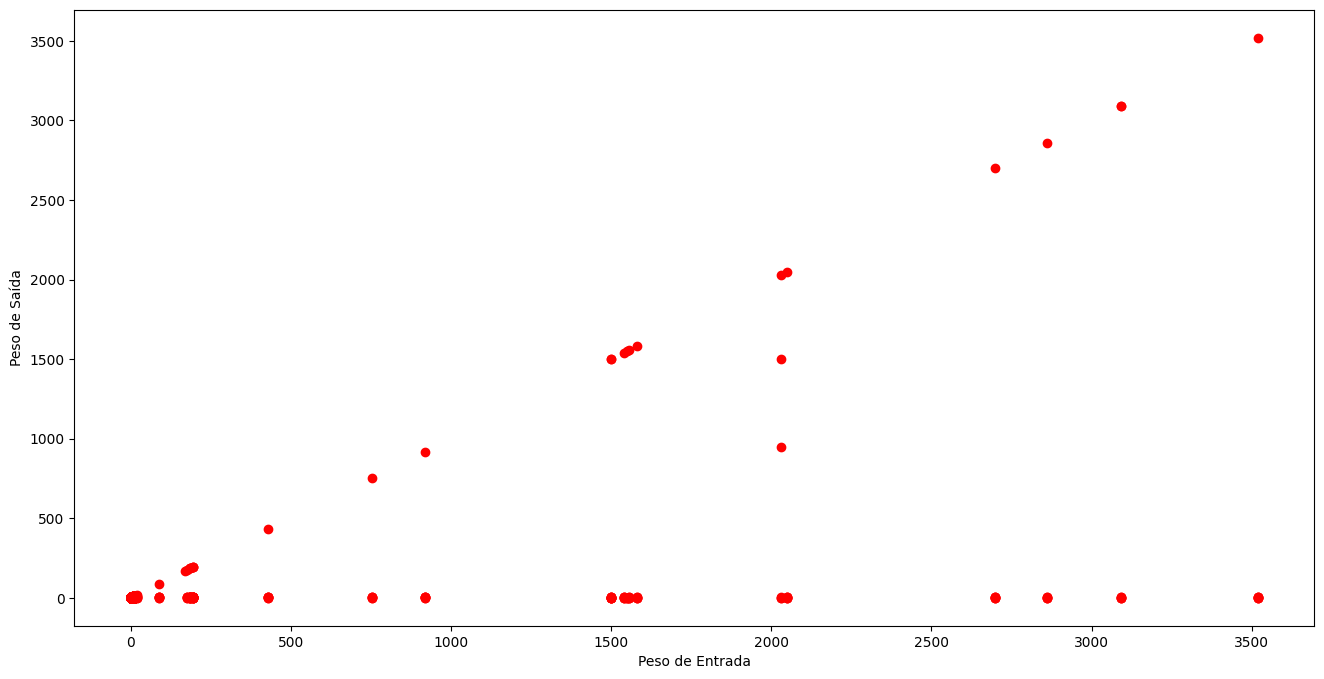

In [159]:
plt.figure(figsize = (16,8))
plt.scatter(
    df_novo['output_weight_media'], 
    df_novo['input_weight_media'], 
    c='red')
plt.ylabel("Peso de Saída")
plt.xlabel("Peso de Entrada")
plt.show()

In [160]:
#remover linhas que contem valores nulos para ouput_total e input_total
df_novo = df_novo.dropna(subset=['output_total', 'input_total'])
df_novo

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,input_total,deaths,mortality,output_total,percent_usable,input_weight_media,output_weight_media
0,2021-02-10,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,3,0.101,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.101,2.666
1,2021-02-13,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,6,0.176,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.176,2.666
2,2021-02-20,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,13,0.454,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.454,2.666
3,2021-02-27,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,20,0.879,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.879,2.666
4,2021-03-06,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,27,1.451,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,1.451,2.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131641,2022-08-13,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,fe593351-1304-425f-990a-09ae020fe742,e68a2882-a594-446a-9122-ce73dc900a56,32,1.914,1,34000,34000.0,2194.0,6.452941,31482.0,0.002941,1.914,5.796
131642,2022-08-14,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,fe593351-1304-425f-990a-09ae020fe742,e68a2882-a594-446a-9122-ce73dc900a56,33,2.028,1,34000,34000.0,2194.0,6.452941,31482.0,0.002941,2.028,5.796
131643,2022-08-15,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,fe593351-1304-425f-990a-09ae020fe742,e68a2882-a594-446a-9122-ce73dc900a56,34,2.162,1,34000,34000.0,2194.0,6.452941,31482.0,0.002941,2.162,5.796
131644,2022-08-16,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,fe593351-1304-425f-990a-09ae020fe742,e68a2882-a594-446a-9122-ce73dc900a56,35,4.255,2,34000,34000.0,2194.0,6.452941,31482.0,0.005882,4.255,5.796


In [161]:
import seaborn as sns
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm
import os

y = df_novo['output_total'].values.reshape(-1,1)
X = df_novo['input_total'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)

print("O modelo é: Output = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Output = 1373.9 + 0.89681X


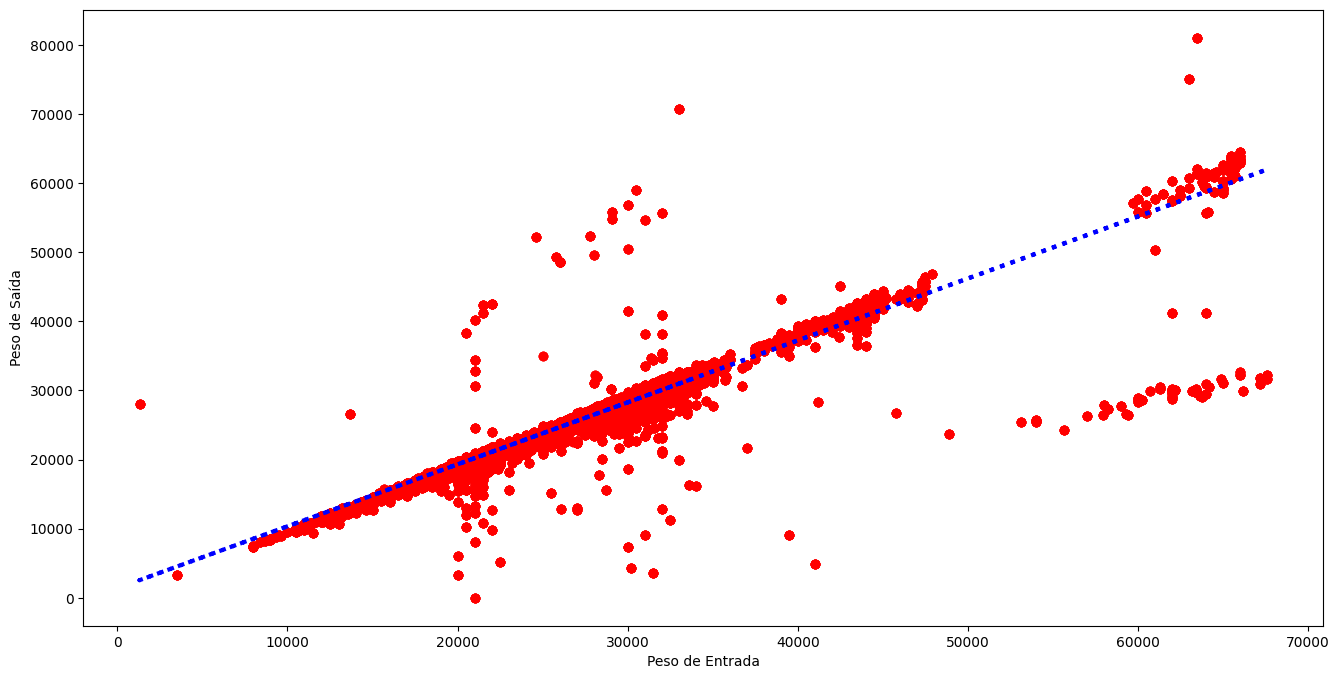

In [162]:
f_previsaoes = reg.predict(X)


plt.figure(figsize = (16,8))
plt.scatter(
    df_novo['input_total'], 
    df_novo['output_total'], 
    c='red')


plt.plot(
    df_novo['input_total'],
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.ylabel("Peso de Saída")
plt.xlabel("Peso de Entrada")
plt.show()

In [165]:
y = df_novo['output_weight_media'].values.reshape(-1,1)
X = df_novo['input_weight_media'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)

print("O modelo é: Output Media = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Output Media = 2.9003 + 1.0223X


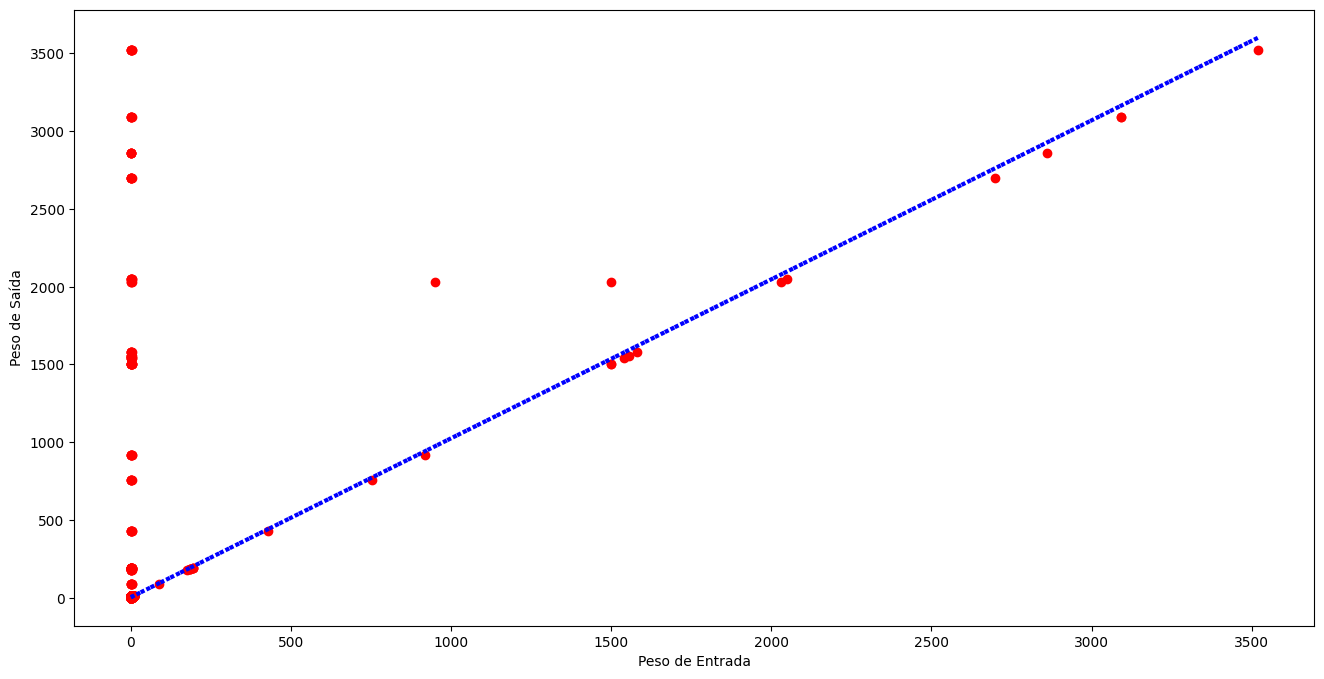

In [166]:
f_previsaoes = reg.predict(X)


plt.figure(figsize = (16,8))
plt.scatter(
    df_novo['input_weight_media'], 
    df_novo['output_weight_media'], 
    c='red')


plt.plot(
    df_novo['input_weight_media'],
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.ylabel("Peso de Saída")
plt.xlabel("Peso de Entrada")
plt.show()

In [52]:
df_novo.head()
 

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,input_total,deaths,mortality,output_total,percent_usable,input_weight_media,output_weight_media
0,2021-02-10,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,3,0.101,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.101,2.666
1,2021-02-13,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,6,0.176,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.176,2.666
2,2021-02-20,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,13,0.454,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.454,2.666
3,2021-02-27,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,20,0.879,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.879,2.666
4,2021-03-06,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,27,1.451,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,1.451,2.666


In [53]:
df_novo.describe()

,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,input_total,deaths,mortality,output_total,percent_usable,input_weight_media,output_weight_media
count,125563.00000,1.255630e+05,125563.000000,125563.00000,125563.000000,125563.000000,125563.000000,125563.000000,125563.000000,125563.000000,125563.000000
mean,22.70250,1.987355e+04,7638.158279,26761.70246,26918.093411,1420.955210,5.270645,25514.430294,26.720496,1.576164,4.430456
std,13.77959,7.172540e+05,12937.322575,6733.50134,6784.569685,2092.376404,6.926082,6385.277212,47.087071,23.971025,55.865124
min,1.00000,3.000000e-03,1.000000,0.00000,1300.000000,69.000000,0.209091,1.000000,0.001515,0.000399,0.005762
25%,13.00000,4.620000e-01,1.000000,21000.00000,21000.000000,826.000000,3.319355,20216.000000,0.003279,0.400000,2.770000
50%,21.00000,1.678000e+00,1.000000,27412.00000,28000.000000,1114.000000,4.316770,26220.000000,0.004762,0.990000,3.003000
75%,34.00000,5.339000e+03,17600.000000,31498.00000,31600.000000,1527.000000,5.625204,30054.000000,100.000000,2.217000,3.234000
max,919.00000,1.115840e+08,124000.000000,67580.00000,67580.000000,68817.000000,213.717391,81066.000000,2346.153846,3520.000000,3520.000000


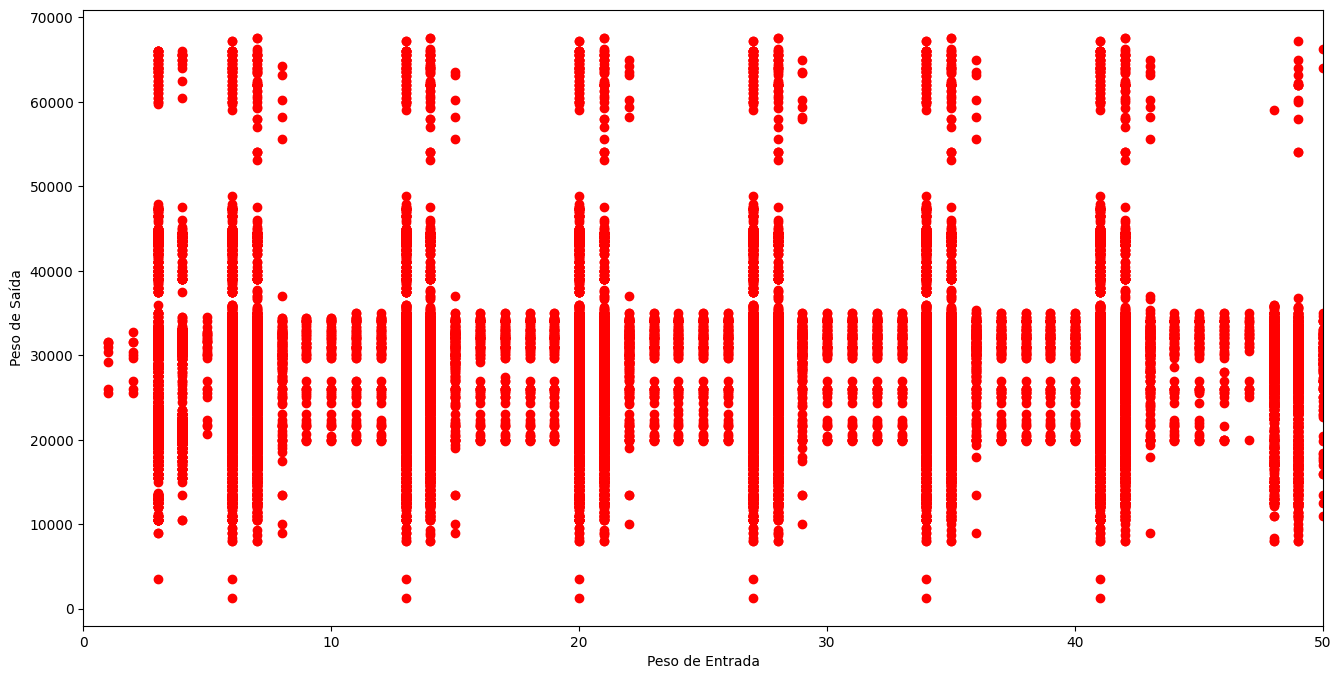

In [167]:

plt.figure(figsize = (16,8))
plt.scatter(
    df_novo['animal_group_age'], 
    df_novo['input_total'], 
    c='red')
plt.ylabel("Peso de Saída")
plt.xlabel("Peso de Entrada")
plt.xlim(0, 50)
plt.show()

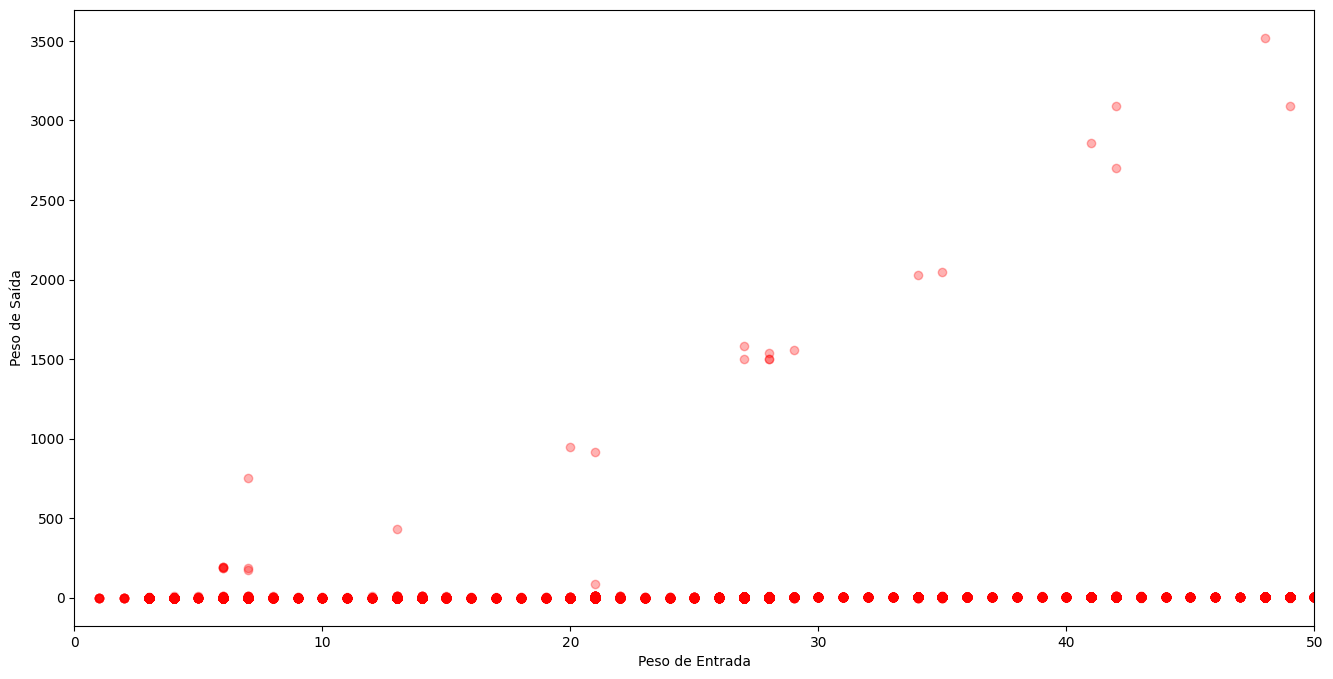

In [176]:
plt.figure(figsize = (16,8))
plt.scatter(
    df_novo['animal_group_age'], 
    df_novo['input_weight_media'], 
    c='red',
    alpha=0.3)
plt.ylabel("Peso de Saída")
plt.xlabel("Peso de Entrada")
plt.xlim(0, 50)
plt.show()

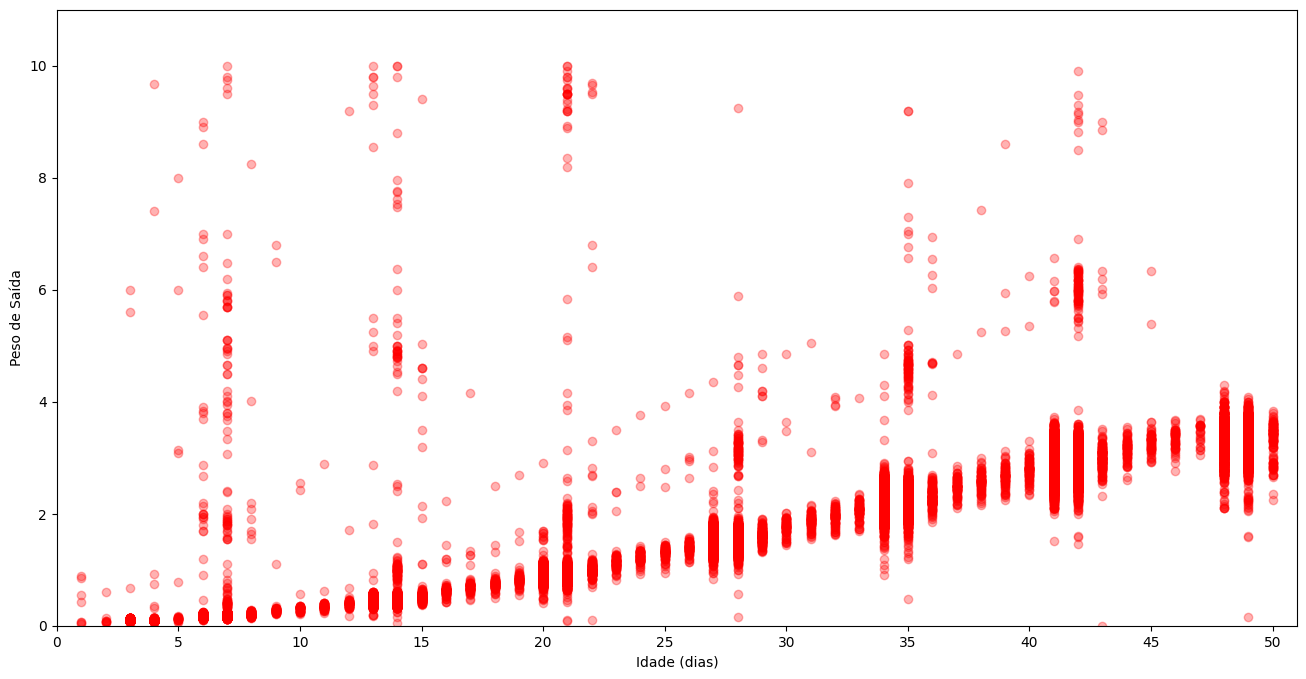

In [201]:
plt.figure(figsize=(16, 8))
plt.scatter(
    df_novo['animal_group_age'],
    df_novo['input_weight_media'],
    c='red',
    alpha=0.3 
)
plt.ylabel("Peso de Saída")
plt.xlabel("Idade (dias)")

# Defina os intervalos desejados no eixo x
intervalo_x = range(0, 51, 5)  # Vai de 0 a 51 em incrementos de 5

# Configure os rótulos do eixo x para exibir os intervalos desejados
plt.xticks(intervalo_x)
plt.ylim(0, 11)
plt.xlim(0, 51)
plt.show()


In [198]:
y = df_novo['input_weight_media'].values.reshape(-1,1)
X = df_novo['animal_group_age'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)

print("O modelo é: Input_saida = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Input_saida = -0.43666 + 0.08936X


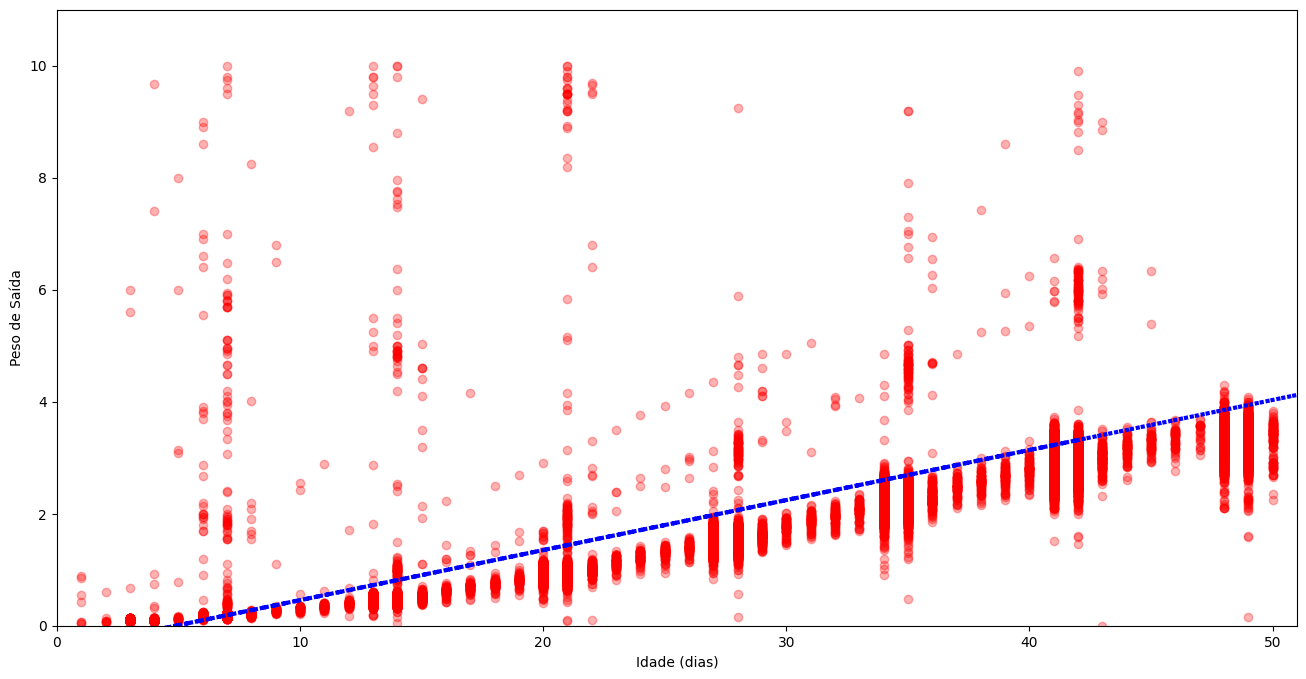

In [208]:
f_previsoes = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    df_novo['animal_group_age'],
    df_novo['input_weight_media'],
    c='red',
    alpha=0.3
)

plt.plot(
    df_novo['animal_group_age'],
    f_previsoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.ylabel("Peso de Saída")
plt.xlabel("Idade (dias)")

# Limite o eixo x a 51 e o eixo y a 10
plt.xlim(0, 51)
plt.ylim(0, 11)

plt.show()


In [192]:
#verificar quantos lotes com idade de 10 dias pra mais o valor de input_weight_media é menor que 1
df_novo[(df_novo['animal_group_age'] > 10) & (df_novo['input_weight_media'] < 1)]



,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,input_total,deaths,mortality,output_total,percent_usable,input_weight_media,output_weight_media
2,2021-02-20,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,13,0.454,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.45,2.666
3,2021-02-27,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,20,0.879,1,19600,19600.0,513.0,2.617347,18992.0,0.005102,0.88,2.666
9,2021-06-19,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,0975479f-edf6-4d21-acd7-65874c8aa369,13,0.445,1,21500,21500.0,958.0,4.455814,20536.0,0.004651,0.44,2.428
10,2021-06-26,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,0975479f-edf6-4d21-acd7-65874c8aa369,20,0.863,1,21500,21500.0,958.0,4.455814,20536.0,0.004651,0.86,2.428
16,2022-05-25,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,1c226a2d-32d9-4f3e-b8ca-b58244909f6f,13,0.473,1,20498,20500.0,751.0,3.663415,19779.0,0.004878,0.47,2.783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131625,2022-07-28,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,fe593351-1304-425f-990a-09ae020fe742,e68a2882-a594-446a-9122-ce73dc900a56,16,0.581,1,34000,34000.0,2194.0,6.452941,31482.0,0.002941,0.58,5.796
131626,2022-07-29,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,fe593351-1304-425f-990a-09ae020fe742,e68a2882-a594-446a-9122-ce73dc900a56,17,0.654,1,34000,34000.0,2194.0,6.452941,31482.0,0.002941,0.65,5.796
131627,2022-07-30,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,fe593351-1304-425f-990a-09ae020fe742,e68a2882-a594-446a-9122-ce73dc900a56,18,0.740,1,34000,34000.0,2194.0,6.452941,31482.0,0.002941,0.74,5.796
131628,2022-07-31,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,fe593351-1304-425f-990a-09ae020fe742,e68a2882-a594-446a-9122-ce73dc900a56,19,0.779,1,34000,34000.0,2194.0,6.452941,31482.0,0.002941,0.78,5.796


In [182]:
#verificar quantos input_weight_media é maior que 5
df_novo[df_novo['input_weight_media'] > 3.5]

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,input_total,deaths,mortality,output_total,percent_usable,input_weight_media,output_weight_media
2005,2023-05-13,071c638d-bb9b-4e68-a5d1-416da57d887f,060766d4-8c9a-4923-8fa4-e70549cd52ea,beed45e9-ab8b-48de-989d-64b6058af6f8,41,3.510,1,43599,43600.0,2317.0,5.314220,41238.0,0.002294,3.51,3.510
2948,2022-06-24,071c638d-bb9b-4e68-a5d1-416da57d887f,07b43317-6b6f-41e8-9d52-8737d21d6d13,ce6bb34c-8368-473c-9def-e28ba784bba4,41,3.554,1,20500,20500.0,1307.0,6.375610,19054.0,0.004878,3.55,3.554
3602,2022-11-26,071c638d-bb9b-4e68-a5d1-416da57d887f,09361500-87a6-4503-b890-64bd357a8dbb,aa0a6b6e-b19c-4b68-bf5a-97b8a24d6282,41,3.545,1,15494,15500.0,645.0,4.161290,14790.0,0.006452,3.54,3.545
3748,2021-03-05,071c638d-bb9b-4e68-a5d1-416da57d887f,0a76444c-a2df-4370-a749-5c1a3c1e42a2,4aff3767-fdcb-4704-8252-a4630b2601b4,41,3.624,1,20664,20664.0,1559.0,7.544522,19008.0,0.004839,3.62,3.624
3822,2021-04-28,071c638d-bb9b-4e68-a5d1-416da57d887f,0a76444c-a2df-4370-a749-5c1a3c1e42a2,b77783f4-0c35-4b7b-89f1-9520e7a1d8b5,41,3.569,1,20916,20916.0,1027.0,4.910117,19271.0,0.004781,3.57,3.569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131476,2022-12-08,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,f79310aa-77bb-467c-8cb8-91cd43bb1320,1930a3a8-20d5-4cbd-9d78-da3db5deb24c,42,5.829,2,30700,30700.0,1399.0,4.557003,27828.0,0.006515,5.83,5.829
131506,2022-07-23,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,f79310aa-77bb-467c-8cb8-91cd43bb1320,3423ebee-9c88-41a8-ac12-bbcbbde1823d,35,4.209,2,30700,30700.0,382.0,1.244300,29220.0,0.006515,4.21,4.209
131569,2023-03-07,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,fe593351-1304-425f-990a-09ae020fe742,50a86f41-fdda-483d-acd6-473cce32dd4c,42,6.040,2,33992,34000.0,587.0,1.726471,33652.0,0.005882,6.04,6.040
131644,2022-08-16,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,fe593351-1304-425f-990a-09ae020fe742,e68a2882-a594-446a-9122-ce73dc900a56,35,4.255,2,34000,34000.0,2194.0,6.452941,31482.0,0.005882,4.26,5.796
